## Flow state diagram

In [63]:
# importing libraries

import os
import glob
import matplotlib
import math
import matplotlib.cm     as     cm
import numpy             as     np
import pandas            as     pd
import scipy.optimize    as     opt
from scipy.optimize import curve_fit
import matplotlib.pyplot as     plt
from   matplotlib        import font_manager
from   fractions         import Fraction
import pickle
import warnings
from prettytable import PrettyTable
from IPython.display import display, HTML 
warnings.filterwarnings('ignore', category=DeprecationWarning, module='mkl')

# Matplotlib rc parameters modification
plt.rcParams.update({
  "figure.max_open_warning": 0,
  "text.usetex": True,
  "text.latex.preamble": r"\usepackage{type1cm}",
  "figure.autolayout": True,
  "font.family": "STIXGeneral",
  "mathtext.fontset": "stix",
  "font.size":        8,
  "xtick.labelsize":  8,
  "ytick.labelsize":  8,
  "lines.linewidth":  1,
  "lines.markersize": 5
})
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']

In [67]:
## checking simulation status
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

top_dir="/home/rahul/mnt/sshfs_darwin/simulations/flow_state/"   #linux
#top_dir = "/Users/rahul/mnt/sshfs_darwin/simulations/" #mac

NP  = 1000
# stress = [
#     "0.1r", "0.2r", "0.5r", "1r", "5r", "10r", "11r", "12r", "15r", "20r", 
#     "25r", "30r", "35r", "40r", "45r", "50r", "100r", "200r"
# ]
# phiv = [
#     "0.70", "0.71", "0.72", "0.73", "0.74", "0.75", "0.754", "0.756", "0.758", "0.76", "0.762", 
#     "0.764", "0.766", "0.768", "0.77", "0.772", "0.774", "0.776", "0.778", "0.78", "0.782", 
#     "0.784", "0.786", "0.788", "0.79", "0.80"
# ]
stress = [
    '0.1r','0.2r','0.5r','1r', '1.5r', '2r', '2.5r', 
    '3r', '4r', '5r','10r','50r','100r', '200r'
]
phiv = [
    "0.70", "0.71", "0.72", "0.73", "0.74", "0.745", "0.75", "0.750", "0.755", "0.76",
    "0.760","0.765", "0.77", "0.770", "0.775", "0.78", "0.780","0.785", "0.79", "0.790", "0.80"
]

ar = '1.4'
vr = '0.5'
numRun   = 1
maxGamma = 6
    
if not os.path.exists(top_dir):
    print("Cluster not mounted")
for s, stresss in enumerate(stress):
    for phij in phiv:
        cdir = f'{top_dir}stress_{stresss}/NP_{NP}/phi_{phij}/ar_{ar}/Vr_{vr}/run_{numRun}'
        time_val = float('nan')
        if os.path.exists(cdir):
            datFile = f'{cdir}/data_random_seed_params_stress{stresss}_shear.dat'
            if os.path.exists(datFile):
                with open(datFile, 'r') as file:
                    time_val = float(file.readlines()[-1].split()[1])
                    #print(f' stress_{stress}/phi_{phij} - Strain: {time_val}')
            if time_val != maxGamma:
                jammed_file = f'{cdir}/jammed.txt'
                if not os.path.exists(jammed_file):
                    print(f'not completed: Strain - {time_val}. stress_{stresss}/phi_{phij}')
                #else:
                    #print(f'JAMMED: Strain - {time_val}. stress_{stresss}/phi_{phij}')

JAMMED: Strain - 0.248706. stress_0.1r/phi_0.80
JAMMED: Strain - 3.06496. stress_4r/phi_0.785
JAMMED: Strain - 0.719827. stress_4r/phi_0.790
JAMMED: Strain - 5.22549. stress_5r/phi_0.785
JAMMED: Strain - 0.460624. stress_5r/phi_0.79
JAMMED: Strain - 0.460561. stress_5r/phi_0.790
JAMMED: Strain - 0.195813. stress_5r/phi_0.80
JAMMED: Strain - 1.65983. stress_10r/phi_0.78
JAMMED: Strain - 0.237244. stress_10r/phi_0.79
JAMMED: Strain - 0.147579. stress_10r/phi_0.80
JAMMED: Strain - 2.13368. stress_50r/phi_0.77
JAMMED: Strain - 0.263144. stress_50r/phi_0.78
JAMMED: Strain - 0.180764. stress_50r/phi_0.79
JAMMED: Strain - 0.131391. stress_50r/phi_0.80
JAMMED: Strain - 4.65989. stress_100r/phi_0.77
JAMMED: Strain - 0.207088. stress_100r/phi_0.78
JAMMED: Strain - 0.181083. stress_100r/phi_0.79
JAMMED: Strain - 0.11873. stress_100r/phi_0.80
JAMMED: Strain - 2.69823. stress_200r/phi_0.77
JAMMED: Strain - 0.242957. stress_200r/phi_0.78
JAMMED: Strain - 0.166206. stress_200r/phi_0.79
JAMMED: Strain

In [68]:
## Avg visc val
#linux
topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/flow_state/'

npp     = 1000
#stress  = ['0.1r','0.2r','0.5r','1r','5r','10r','50r','100r', '200r']
#phiv    = [0.70, 0.71,  0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.80]
stress = [
    '0.1r','0.2r','0.5r','1r', '1.5r', '2r', '2.5r', 
    '3r', '4r', '5r','10r','50r','100r', '200r'
]
phiv = [
    "0.70", "0.71", "0.72", "0.73", "0.74", "0.745", "0.75", "0.750", "0.755", "0.76",
    "0.760","0.765", "0.77", "0.770", "0.775", "0.78", "0.780","0.785", "0.79", "0.790", "0.80"
]
arr     = '1.4'
vrr     = '0.5'
numRun  = 1
off     = 100 
#cmap = cm.viridis

viscall = []
for s in range(len(stress)):
    visc  = [np.nan for _ in phiv]
    for j, phij in enumerate(phiv):  
        #visc_phi = [np.nan for _ in phiv]
        workDir = f'{topDir}stress_{stress[s]}/NP_{npp}/phi_{phiv[j]}/ar_{arr}/Vr_{vrr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name   = glob.glob(f'{workDir}/data_*.dat')[0]
            jammed_file = f'{workDir}/jammed.txt'
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    strain  = data_array[:, 1]  # Extract the second column (usecols=1)
                    data    = data_array[:, 3][off:]
                    visc1   = float(f"{np.mean(data):.2f}" if len(data) > 0 else np.nan)
                    if visc1 < 0 or np.isnan(visc1) or os.path.exists(jammed_file):
                        visc[j] = np.nan
                    else:
                        visc[j] = visc1
                else:
                    visc[j]  = np.nan
        else:
            #print(f'DNE - {workDir}')
            visc[j]  = np.nan
            
    viscall.append(visc)

df = pd.DataFrame(np.array(viscall).T, index=phiv, columns=stress)
df

,0.1r,0.2r,0.5r,1r,1.5r,2r,2.5r,3r,4r,5r,10r,50r,100r,200r
0.70,26.34,20.60,19.12,23.19,NaN,NaN,NaN,NaN,NaN,67.42,92.53,128.33,132.25,129.00
0.71,35.67,25.00,21.03,28.75,NaN,NaN,NaN,NaN,NaN,84.98,114.82,154.83,171.11,171.85
0.72,42.61,31.41,23.21,31.73,NaN,NaN,NaN,NaN,NaN,98.27,156.67,223.56,241.65,235.24
0.73,57.78,37.15,26.83,36.99,NaN,NaN,NaN,NaN,NaN,130.69,209.05,341.18,339.61,338.88
0.74,80.70,50.43,31.87,41.50,NaN,NaN,NaN,NaN,NaN,167.33,290.15,515.99,519.82,612.04
0.745,NaN,NaN,NaN,47.77,64.71,82.86,108.12,130.89,172.30,205.15,NaN,NaN,NaN,NaN
0.75,120.00,62.94,39.10,54.46,NaN,NaN,NaN,NaN,NaN,249.35,487.47,804.26,1048.22,1250.36
0.750,NaN,NaN,NaN,54.46,77.09,96.61,124.25,152.67,206.32,249.35,NaN,NaN,NaN,NaN
0.755,NaN,NaN,NaN,60.49,81.23,113.26,139.41,186.20,244.29,312.60,NaN,NaN,NaN,NaN
0.76,183.45,87.55,49.10,66.94,NaN,NaN,NaN,NaN,NaN,380.00,703.82,1648.54,2093.47,2441.93


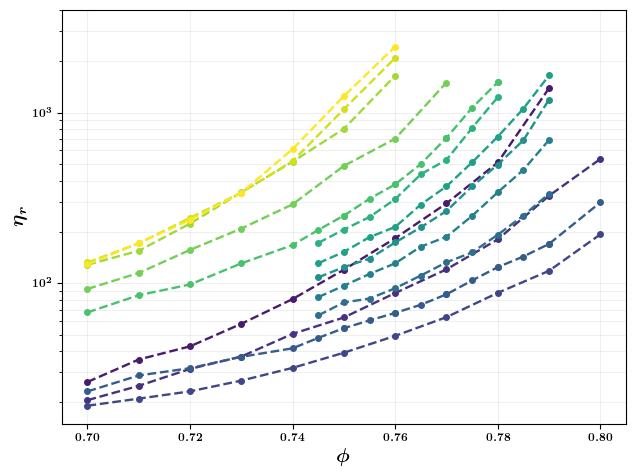

In [69]:
# To plot parameter vs phim all zeta values

#linux
topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/flow_state/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/analysis/figures/new_data/'

npp     = 1000
stress = [
    '0.1r','0.2r','0.5r','1r', '1.5r', '2r', '2.5r', 
    '3r', '4r', '5r','10r','50r','100r', '200r'
]
phiv = [
    "0.70", "0.71", "0.72", "0.73", "0.74", "0.745", "0.75", "0.750", "0.755", "0.76",
    "0.760","0.765", "0.77", "0.770", "0.775", "0.78", "0.780","0.785", "0.79", "0.790", "0.80"
]
arr     = '1.4'
vrr     = '0.5'
numRun  = 1
off     = 100 
cmap = cm.viridis

for s in range(len(stress)):
    visc  = [np.nan for _ in phiv]
    for j, phij in enumerate(phiv):  
        #visc_phi = [np.nan for _ in phiv]
        workDir = f'{topDir}stress_{stress[s]}/NP_{npp}/phi_{phiv[j]}/ar_{arr}/Vr_{vrr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    strain = data_array[:, 1]  # Extract the second column (usecols=1)
                    data   = data_array[:, 3][off:]
                    visc1  = float(f"{np.mean(data)}" if len(data) > 0 else np.nan)
                    jammed_file = f'{workDir}/jammed.txt'
                    if visc1 < 0 or np.isnan(visc1) or os.path.exists(jammed_file):
                        visc[j] = np.nan
                    else:
                        visc[j] = visc1
                else:
                    visc[j]  = np.nan
        else:
            #print(f'DNE - {workDir}')
            visc[j]  = np.nan
            
    visc_plot  = [i for i in visc if not np.isnan(i)]
    phi_plot   = [float(phiv[i]) for i in range(len(phiv)) if not np.isnan(visc[i])]
    plt.plot(phi_plot, visc_plot, linestyle='--', marker = 'o',
             color=cmap((s+1)/len(stress)), linewidth=1.7, markersize=4)

plt.grid(which='both', alpha=0.2)
plt.xlabel(r'$\mathbf{\phi}$', fontsize=14, fontweight='bold', style='italic')
plt.ylabel(r'$\eta_r$', fontsize=14, fontweight='bold', style='italic')
plt.yscale('log')
plt.ylim([15, 4000])
#plt.xlim([0.735])
plt.tight_layout()
if False:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "flowcurve"+figFormat, bbox_inches="tight",dpi=500, transparent=False)
plt.show()

In [39]:
## Avg shear rate val
#linux
topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/flow_state/'

npp     = 1000
stress = [
    '0.1r','0.2r','0.5r','1r', '1.5r', '2r', '2.5r', 
    '3r', '4r', '5r','10r','50r','100r', '200r'
]
phiv = [
    "0.70", "0.71", "0.72", "0.73", "0.74", "0.745", "0.75", "0.750", "0.755", "0.76",
    "0.760","0.765", "0.77", "0.770", "0.775", "0.78", "0.780","0.785", "0.79", "0.790", "0.80"
]
arr     = '1.4'
vrr     = '0.5'
numRun  = 1
off     = 100 
cmap    = cm.viridis

srall = []
for s in range(len(stress)):
    sr  = [np.nan for _ in phiv]
    for j, phij in enumerate(phiv):  
        #visc_phi = [np.nan for _ in phiv]
        workDir = f'{topDir}stress_{stress[s]}/NP_{npp}/phi_{phiv[j]:.2f}/ar_{arr}/Vr_{vrr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    data   = data_array[:, 2][off:]
                    sr[j]  = float(f"{np.mean(data):.4f}" if len(data) > 0 else np.nan)
                else:
                    sr[j]  = np.nan
        else:
            print(f'DNE - {workDir}')
    srall.append(sr)

df = pd.DataFrame(np.array(srall).T, index=phiv, columns=stress)
df

,0.1r,0.2r,0.5r,1r,5r,10r,50r,100r,200r
0.70,0.0038,0.0098,0.0263,0.0437,0.0754,0.1112,0.3955,0.7784,1.5829
0.71,0.0028,0.0080,0.0239,0.0349,0.0594,0.0881,0.3276,0.5964,1.1968
0.72,0.0024,0.0064,0.0216,0.0317,0.0517,0.0648,0.2332,0.4249,0.8780
0.73,0.0018,0.0054,0.0187,0.0273,0.0393,0.0490,0.1538,0.3073,0.6157
0.74,0.0013,0.0040,0.0158,0.0243,0.0311,0.0355,0.1023,0.2019,0.3535
0.75,0.0009,0.0032,0.0129,0.0185,0.0206,0.0218,0.0668,0.1061,0.1830
0.76,0.0006,0.0023,0.0103,0.0151,0.0138,0.0153,0.0340,0.0563,0.0978
0.77,0.0004,0.0017,0.0080,0.0117,0.0076,0.0078,0.0172,0.0264,0.0498
0.78,0.0002,0.0011,0.0058,0.0082,0.0037,0.0040,NaN,NaN,NaN
0.79,0.0001,0.0006,0.0043,0.0060,NaN,NaN,NaN,NaN,NaN


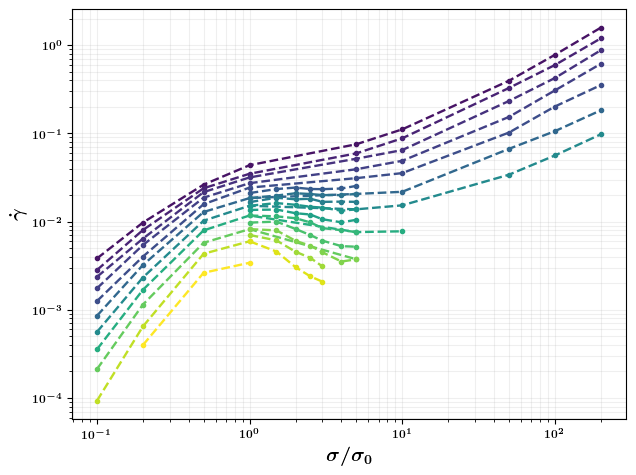

In [70]:
# To plot parameter vs phim all zeta values

#linux
topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/flow_state/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/analysis/figures/new_data/'

npp     = 1000
stress = [
    '0.1r','0.2r','0.5r','1r', '1.5r', '2r', '2.5r', 
    '3r', '4r', '5r','10r','50r','100r', '200r'
]
phiv = [
    "0.70", "0.71", "0.72", "0.73", "0.74", "0.745", "0.75", "0.750", "0.755", "0.76",
    "0.760","0.765", "0.77", "0.770", "0.775", "0.78", "0.780","0.785", "0.79", "0.790", "0.80"
]
arr     = '1.4'
vrr     = '0.5'
numRun  = 1
off     = 100 
cmap = cm.viridis

for j, phij in enumerate(phiv):  
    sr  = [np.nan for _ in stress]
    for s in range(len(stress)):
        #visc_phi = [np.nan for _ in phiv]
        workDir = f'{topDir}stress_{stress[s]}/NP_{npp}/phi_{phiv[j]}/ar_{arr}/Vr_{vrr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name   = glob.glob(f'{workDir}/data_*.dat')[0]
            jammed_file = f'{workDir}/jammed.txt'
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    data   = data_array[:, 2][off:]
                    sr_val = float(f"{np.mean(data)}" if len(data) > 0 else np.nan)
                    if np.any(data < 0) or np.isnan(sr_val) or os.path.exists(jammed_file):
                        sr[s] = np.nan
                    else:
                        sr[s]  = sr_val
                else:
                    sr[s]  = np.nan
        else:
            #print(f'DNE - {workDir}')
            sr[s]  = np.nan
    
    sr_plot     = [i for i in sr if not np.isnan(i)]
    stress_plot = [float(stress[i][:-1]) for i in range(len(stress)) if not np.isnan(sr[i])]
    plt.plot(stress_plot, sr_plot, linestyle='--', marker = 'o',
             label=r'$\phi = {:.3f}$'.format(float(phij)), 
             color=cmap((j+1)/len(phiv)), linewidth=1.7, markersize=3)

plt.grid(which='both', alpha=0.2)
plt.xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=14, fontweight='bold', style='italic')
plt.ylabel(r'$\dot\gamma$', fontsize=14, fontweight='bold', style='italic')
plt.xscale('log')
plt.yscale('log')
#plt.legend()
#plt.tight_layout()

if False:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "flowcurve"+figFormat, bbox_inches="tight",dpi=500, transparent=False)
plt.show()

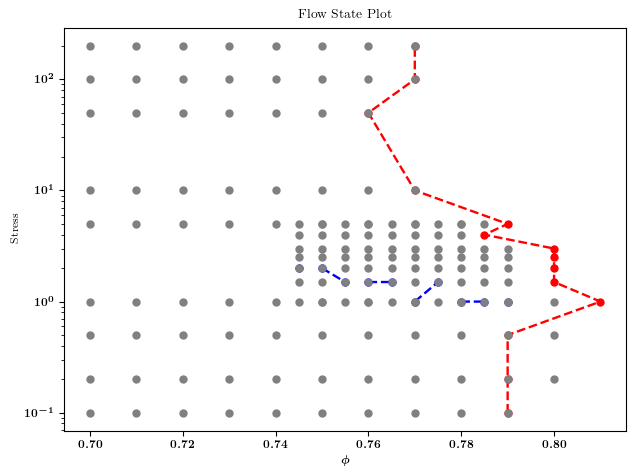

In [104]:
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm

topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/flow_state/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/analysis/figures/new_data/'

npp     = 1000
stress = [
    '0.1r','0.2r','0.5r','1r', '1.5r', '2r', '2.5r', 
    '3r', '4r', '5r','10r','50r','100r', '200r'
]
phiv = [
    "0.70", "0.71", "0.72", "0.73", "0.74", "0.745", "0.75", "0.750", "0.755", "0.76",
    "0.760","0.765", "0.77", "0.770", "0.775", "0.78", "0.780","0.785", "0.79", "0.790", "0.80"
]
arr     = '1.4'
vrr     = '0.5'
numRun  = 1
off     = 100
cmap    = cm.viridis
sj      = [0] * len(stress)
viscall = []

# plotting simulation points (non jamming)
for s in range(len(stress)):
    visc  = [np.nan for _ in phiv]
    for j, phij in enumerate(phiv):  
        #visc_phi = [np.nan for _ in phiv]
        workDir = f'{topDir}stress_{stress[s]}/NP_{npp}/phi_{phiv[j]}/ar_{arr}/Vr_{vrr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    data    = data_array[:, 3][off:]
                    visc1   = float(f"{np.mean(data):.2f}" if len(data) > 0 else np.nan)
                    if visc1 < 0 or np.isnan(visc1):
                        visc[j] = np.nan
                    else:
                        visc[j] = visc1
                        plt.scatter(float(phij), float(stress[s][:-1]), color='grey', zorder=5)
                else:
                    visc[j]  = np.nan
        else:
            #print(f'DNE - {workDir}')
            visc[j]  = np.nan
    viscall.append(visc)

# Jamming line
for kk in range(len(viscall)):
    jamming_index_all  = np.where(np.isnan(viscall[kk]))[0]
    jamming_index      = []
    current_group      = []
    for i in jamming_index_all:
        if not current_group or i == current_group[-1] + 1:
            current_group.append(i)
        else:
            jamming_index.append(current_group)
            current_group = [i]
    if current_group:
        jamming_index.append(current_group)
        
    if list(jamming_index):
        sj[kk] = float(phiv[jamming_index[-1][0]])
    else:
        sj[kk] = float(phiv[-1]) + 0.01

stress_plot = [float(i[:-1]) for i in stress]
plt.plot(sj, stress_plot, linestyle='--', marker='o', color='red', linewidth=1.7)

## DST onset
srall = []
for j, phij in enumerate(phiv):  
    sr  = [np.nan for _ in stress]
    for s in range(len(stress)):
        #visc_phi = [np.nan for _ in phiv]
        workDir = f'{topDir}stress_{stress[s]}/NP_{npp}/phi_{phiv[j]}/ar_{arr}/Vr_{vrr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    data  = data_array[:, 2][off:]
                    sr[s] = float(f"{np.mean(data)}" if len(data) > 0 else np.nan)
                else:
                    sr[s]  = np.nan
        else:
            #print(f'DNE - {workDir}')
            sr[s]  = np.nan
    srall.append(sr)

onset_phi = []
stress_plot = []
for kk in range(len(srall)):
    onset_index = [i for i in range(len(srall[kk]) - 1) if srall[kk][i+1] < srall[kk][i]]
    if onset_index:
        onset_phi.append(float(phiv[kk]))
        stress_plot.append(float(stress[onset_index[0]][:-1]))
    else:
        onset_phi.append(np.nan)
        stress_plot.append(np.nan)

plt.plot(onset_phi, stress_plot, linestyle='--', marker='o', color='blue', linewidth=1.7)
#plt.xlim([0.735, 0.815])
plt.yscale('log')
plt.xlabel(r'$\phi$')
plt.ylabel('Stress')
plt.title('Flow State Plot')
#plt.grid(True)
plt.show()

In [103]:
srall

[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [94]:
vv = [1,2,3,4, np.nan, np.nan, 5, 6, 7, 8 , np.nan, np.nan, np.nan, 9, 10, np.nan, np.nan, np.nan, np.nan]
nanlist = list(np.where(np.isnan(vv)))[0]
vk = []
vk.append([nanlist[i] for i in range(len(nanlist)-1) if nanlist[i+1] == nanlist[i] + 1])

In [93]:
nanlist

[array([ 4,  5, 10, 11, 12, 15, 16, 17, 18])]

In [98]:
import numpy as np

vv = [1, 2, 3, 4, np.nan, np.nan, 5, 6, 7, 8, np.nan, np.nan, np.nan, 9, 10, np.nan, np.nan, np.nan, np.nan]

# Get indices of np.nan
nan_indices = [i for i, val in enumerate(vv) if np.isnan(val)]
nan_indices = list(np.where(np.isnan(vv)))[0]
# Group consecutive indices
consecutive_groups = []
current_group = []

for i in nan_indices:
    if not current_group or i == current_group[-1] + 1:
        current_group.append(i)
    else:
        consecutive_groups.append(current_group)
        current_group = [i]

if current_group:
    consecutive_groups.append(current_group)

print(consecutive_groups)

[[4, 5], [10, 11, 12], [15, 16, 17, 18]]
